In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import regex as re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df19=pd.read_excel('ipl19.xlsx')
player_names19=df19["Ipl19,csv"][3:193]
player_names_19=[]
index=player_names19.index.tolist()
for i in index:
    player_names_19.append(re.findall(r"[a-zA-z]+ [a-zA-Z]+ *[a-zA-Z.]*",player_names19[i])[0])
auction_prices19=df19["Unnamed: 6"][3:193]

In [4]:
def ref_number(player_names):
    lst_ref_numbers=[]
    for name in player_names:
        if name==np.nan:
            continue
        name=name + " espncricinfo stats"
        html_page = requests.get("https://www.google.com/search?q="+name)
        soup = BeautifulSoup(html_page.content)
        links=soup.findAll("a")
        for link in  soup.find_all("a",href=re.compile("(?<=/url\?q=)(htt.*://.*)")):
            web_page=re.split(":(?=http)",link["href"].replace("/url?q=",""))
            if "www.espncricinfo.com" in web_page[0]:
                break
            else:
                continue
        ref_number=re.findall(r"(\d+)",web_page[0])
        lst_ref_numbers.append(ref_number[0])
    return lst_ref_numbers

In [ ]:
lst_ref_numbers_19=ref_number(player_names_19)

In [113]:
df20=pd.read_excel('2020(excel).xlsx')
player_names20=df20["Player"]
player_names_20=[]
index=player_names20.index.tolist()
for i in index:
    player_names_20.append(re.findall(r"[a-zA-z]+ [a-zA-Z]+ *[a-zA-Z.]*",player_names20[i])[0])
auction_prices20=df20['Salary']

In [6]:
lst_ref_numbers_20=ref_number(player_names_20)

In [114]:
df18=pd.read_excel('2018-1.xlsx')
player_names18=df18["Unnamed: 0"][2:188]
player_names_18=[]
index=player_names18.index.tolist()
for i in index:
    player_names_18.append(re.findall(r"[a-zA-z.]+ [a-zA-Z.]+ *[a-zA-Z.]*",player_names18[i])[0])
auction_prices18=df18["Unnamed: 4"][3:192]

In [141]:
lst_ref_numbers_18=ref_number(player_names_18)

In [143]:
auction_prices18.reset_index(drop=True, inplace=True)
auction_prices19.reset_index(drop=True, inplace=True)
auction_prices20.reset_index(drop=True, inplace=True)
numbers_price=pd.DataFrame({"numbers":lst_ref_numbers_20+lst_ref_numbers_19+lst_ref_numbers_18,'price':auction_prices20.tolist()+auction_prices19.tolist()+auction_prices18.tolist()})
numbers_price.to_csv(r'/Users/bhalli/Desktop/DS/project/numbers_price.csv')

In [118]:
df_main = pd.read_csv('IPL-DB.csv')
df_age = pd.read_csv('ipl-AGE.csv')

In [146]:
ref_numbers_main=ref_number(df_main['Player'])

In [196]:
ref_numbers_main_df=pd.DataFrame({"reference numbers":ref_numbers_main})
df_main_with_numbers=pd.concat([df_main,ref_numbers_main_df],axis=1)
# df_main_with_numbers.to_csv(r'/Users/bhalli/Desktop/DS/project/df_main_with_numbers.csv')

,Team,Player,Tournament,Runds Scored,Batting Average,Balls Faced,Batting Strike Rate,100,50,4s,...,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made,Age,Country,Wicketkeeper,AllRounder,reference numbers,reference numbers
0,Delhi Daredevils,CH Morris,IPL 2016,195,65,109,178.89,0,1,15,...,0,0,8,0,33.0,South Africa,0.0,All,439952,439952
1,Delhi Daredevils,CH Morris,IPL 2017,154,30.8,94,163.82,0,1,15,...,1,0,5,0,33.0,South Africa,0.0,All,439952,439952
2,Delhi Daredevils,CH Morris,IPL 2018,46,46,26,176.92,0,0,3,...,0,0,2,0,33.0,South Africa,0.0,All,439952,439952
3,Delhi Daredevils,JP Duminy,IPL 2016,191,38.2,156,122.43,0,0,13,...,0,0,3,0,36.0,South Africa,0.0,Bat,44932,44932
4,Delhi Daredevils,Q de Kock,IPL 2016,445,37.08,327,136.08,1,3,52,...,-,-,2,2,27.0,South Africa,1.0,Bat,379143,379143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Delhi Capitals,S Lamichhane,IPL 2019,0,0,1,0,0,0,0,...,0,0,2,0,20.0,nepal,0.0,Bowl,960361,960361
627,Delhi Capitals,CA Ingram,IPL 2019,184,18.4,154,119.48,0,0,20,...,-,-,1,0,35.0,South Africa,0.0,bat,45705,45705
628,Delhi Capitals,SE Rutherford,IPL 2019,73,14.6,54,135.18,0,0,2,...,0,0,5,0,22.0,west Indies,0.0,All,914541,914541
629,Delhi Capitals,KMA Paul,IPL 2019,18,3.6,24,75,0,0,1,...,0,0,5,0,22.0,west Indies,0.0,all,677081,677081


In [156]:
ref_numbers_age=ref_number(df_age['Player'])

In [195]:
ref_numbers_age_df=pd.DataFrame({"reference numbers":ref_numbers_age})
df_age_with_numbers=pd.concat([df_age,ref_numbers_age_df],axis=1)
# df_age_with_numbers.to_csv(r'/Users/bhalli/Desktop/DS/project/df_age_with_numbers.csv')

In [2]:
import pandas as pd
import numpy as np

df_price = pd.read_csv('ref_numbers_prices.csv')
df_age = pd.read_csv('df_age_with_numbers.csv')
df_main = pd.read_csv('df_main_with_numbers.csv')
df_main = df_main.drop('Unnamed: 0', axis =1)
df_main['AllRounder'] = df_main['AllRounder'].str.lower()

df_price2018 = df_price[['2018 numbers', '2018 auction price']]
df_price2018 = df_price2018.dropna()
df_price2018 =df_price2018.rename(columns ={'2018 numbers':'reference numbers', '2018 auction price':'price'})

df_price2019 = df_price[['2019 numbers', '2019 auction price']]
df_price2019 = df_price2019.dropna()
df_price2019 = df_price2019.rename(columns ={'2019 numbers':'reference numbers', '2019 auction price':'price'})

df_price2020 = df_price[['2020 numbers', '2020 auction price']]
df_price2020 = df_price2020.dropna()
df_price2020 =df_price2020.rename(columns ={'2020 numbers':'reference numbers', '2020 auction price':'price'})

#df_main = df_main.merge(df_price, on='numbers', how = 'left')
#df_main = df_main[['Team', 'Player', 'Tournament', 'Runds Scored', 'Batting Average', 'Balls Faced', 'Batting Strike Rate', '100', '50', '4s', '6s', 'Overs Bowled', 'Wickets Taken', 'Bowling Average', 'Bowling Economy Rate', 'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets', 'Catches Taken', 'Stumpings Made', 'Age', 'Country', 'Wicketkeeper', 'AllRounder']]

df_main.iloc[:,3] = df_main.iloc[:,3].replace({'-':None}).astype(float)
df_main.iloc[:,4] = df_main.iloc[:,4].replace({'-':None}).astype(float)
df_main.iloc[:,5] = df_main.iloc[:,5].replace({'-':None}).astype(float)
df_main.iloc[:,6] = df_main.iloc[:,6].replace({'-':None}).astype(float)
df_main.iloc[:,7] = df_main.iloc[:,7].replace({'-':None}).astype(float)
df_main.iloc[:,8] = df_main.iloc[:,8].replace({'-':None}).astype(float)
df_main.iloc[:,9] = df_main.iloc[:,9].replace({'-':None}).astype(float)
df_main.iloc[:,10] = df_main.iloc[:,10].replace({'-':None}).astype(float)
df_main.iloc[:,11] = df_main.iloc[:,11].replace({'-':None}).astype(float)
df_main.iloc[:,12] = df_main.iloc[:,12].replace({'-':None}).astype(float)
df_main.iloc[:,13] = df_main.iloc[:,13].replace({'-':None}).astype(float)
df_main.iloc[:,14] = df_main.iloc[:,14].replace({'-':None}).astype(float)
df_main.iloc[:,15] = df_main.iloc[:,15].replace({'-':None}).astype(float)
df_main.iloc[:,16] = df_main.iloc[:,16].replace({'-':None}).astype(float)
df_main.iloc[:,17] = df_main.iloc[:,17].replace({'-':None}).astype(float)

split = df_main.groupby('Tournament')

df_2016 = split.get_group('IPL 2016')
df_2017 = split.get_group('IPL 2017')
df_2018 = split.get_group('IPL 2018')
df_2019 = split.get_group('IPL 2019')


#Fixing Age for years
df_2019['Age'] = df_2019["Age"]-1
df_2018['Age'] = df_2018['Age']-2
df_2017['Age'] = df_2017['Age']-3
df_2016['Age'] = df_2016['Age']-4


#Combining for regression 

for_2020 = df_2018.merge(df_2019, how = 'inner', on = 'reference numbers')
for_2020 = for_2020.merge(df_price2020, how = 'inner', on = 'reference numbers')
#for_2020 = for_2020.dropna
for_2020= for_2020.merge(df_age[['reference numbers','popularity_index']], how = 'inner', on = 'reference numbers')

for_2019 = df_2017.merge(df_2018, how = 'inner', on = 'reference numbers')
for_2019 = for_2019.merge(df_price2019, how = 'inner', on = 'reference numbers')
#for_2019 = for_2019.dropna()
for_2019= for_2019.merge(df_age[['reference numbers','popularity_index']], how = 'inner', on = 'reference numbers')

for_2018 = df_2016.merge(df_2017, how = 'inner', on = 'reference numbers')
for_2018 = for_2018.merge(df_price2018, how = 'inner', on = 'reference numbers')
#for_2018 = for_2018.dropna()
for_2018= for_2018.merge(df_age[['reference numbers','popularity_index']], how = 'inner', on = 'reference numbers')

<ipython-input-2-b5d0e59c9f28>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Age'] = df_2019["Age"]-1
<ipython-input-2-b5d0e59c9f28>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Age'] = df_2018['Age']-2
<ipython-input-2-b5d0e59c9f28>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Text(0.5, 1.0, 'Distribution of Age in 2019')

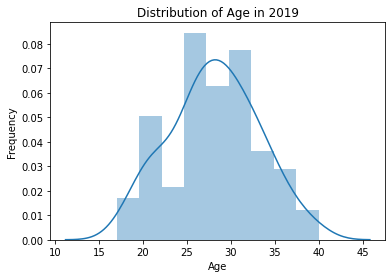

In [3]:
import seaborn as sns
fig = sns.distplot(df_2019['Age'])
fig.set_ylabel('Frequency')
fig.set_title('Distribution of Age in 2019')

In [4]:
#5 most expensive players
print('5 most expensive players in 2020')
print(for_2020.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x']].head(10))
print('5 most expensive players in 2019')
print(for_2019.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x']].head(5))
print('5 most expensive players in 2018')
print(for_2018.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x']].head(5))

print('\n \n \n')
#5 least expensive players
print('5 least expensive players in 2020')
print(for_2020.sort_values(by = 'price', ascending = True)[['Player_x', 'price', 'AllRounder_x']].head(5))
print('5 least expensive players in 2019')
print(for_2019.sort_values(by = 'price', ascending = True)[['Player_x', 'price', 'AllRounder_x']].head(5))
print('5 least expensive players in 2018')
print(for_2018.sort_values(by = 'price', ascending = True)[['Player_x', 'price', 'AllRounder_x']].head(5))

5 most expensive players in 2020
          Player_x   price AllRounder_x
52         V Kohli  1700.0          bat
83        MS Dhoni  1500.0          bat
63       MK Pandey  1100.0          bat
23        KL Rahul  1100.0          bat
43       HH Pandya  1100.0          all
80        SK Raina  1100.0          bat
53  AB de Villiers  1100.0          bat
0        CH Morris  1000.0          all
68     Rashid Khan   900.0         bowl
44       HH Pandya   880.0          all
5 most expensive players in 2019
     Player_x   price AllRounder_x
45    V Kohli  1700.0          bat
31  RG Sharma  1500.0          bat
80   MS Dhoni  1500.0          bat
86  BA Stokes  1250.0          all
19  MK Pandey  1100.0          bat
5 most expensive players in 2018
      Player_x   price AllRounder_x
80   SPD Smith  1700.0          bat
42  KA Pollard  1250.0          all
47   JJ Bumrah  1200.0         bowl
50     V Kohli  1100.0          bat
82    MS Dhoni  1100.0          bat

 
 

5 least expensive players in 

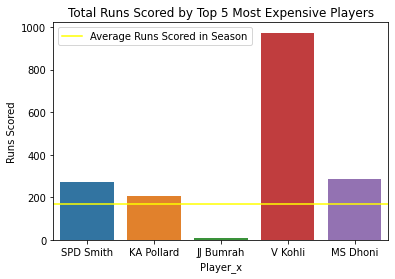

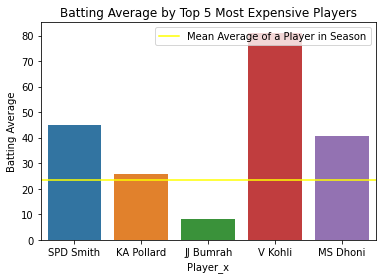

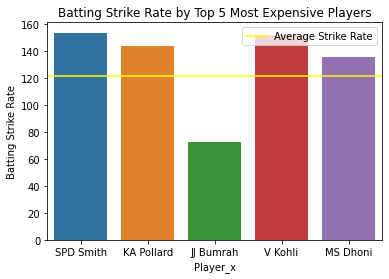

No handles with labels found to put in legend.


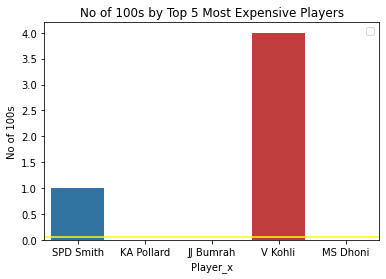

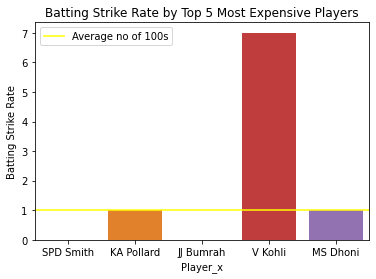

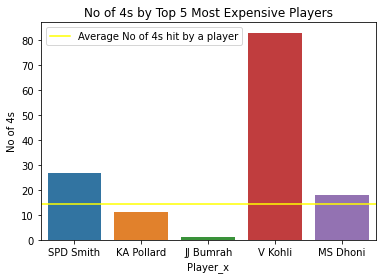

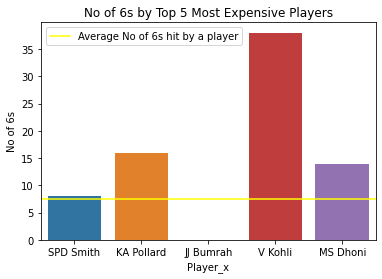

In [5]:
x=for_2018.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x', 'Runds Scored_x', 'Batting Average_x', 'Balls Faced_x', 'Batting Strike Rate_x','100_x', '50_x','4s_x', '6s_x']].head(5)

y1 = sns.barplot(x['Player_x'], x['Runds Scored_x'])
z= for_2020['Runds Scored_x'].mean()
y1.axhline(z, color='yellow', label='Average Runs Scored in Season')
plt.legend()
plt.ylabel('Runs Scored')
plt.title('Total Runs Scored by Top 5 Most Expensive Players')
plt.show()

y2 = sns.barplot(x['Player_x'], x['Batting Average_x'])
z= for_2020['Batting Average_x'].mean()
y2.axhline(z, color='yellow', label='Mean Average of a Player in Season')
plt.legend()
plt.ylabel('Batting Average')
plt.title('Batting Average by Top 5 Most Expensive Players')
plt.show()

y3 = sns.barplot(x['Player_x'], x['Batting Strike Rate_x'])
z= for_2020['Batting Strike Rate_x'].mean()
y3.axhline(z, color='yellow', label='Average Strike Rate')
plt.legend()
plt.ylabel('Batting Strike Rate')
plt.title('Batting Strike Rate by Top 5 Most Expensive Players')
plt.show()

y4 = sns.barplot(x['Player_x'], x['100_x'])
z= for_2020['100_x'].mean()
y4.axhline(z, color='yellow')
plt.legend()
plt.ylabel('No of 100s')
plt.title('No of 100s by Top 5 Most Expensive Players')
plt.show()

y5 = sns.barplot(x['Player_x'], x['50_x'])
z= for_2020['50_x'].mean()
y5.axhline(z, color='yellow', label='Average no of 100s')
plt.legend()
plt.ylabel('Batting Strike Rate')
plt.title('Batting Strike Rate by Top 5 Most Expensive Players')
plt.show()

y6 = sns.barplot(x['Player_x'], x['4s_x'])
z= for_2020['4s_x'].mean()
y6.axhline(z, color='yellow', label='Average No of 4s hit by a player')
plt.legend()
plt.ylabel('No of 4s')
plt.title('No of 4s by Top 5 Most Expensive Players')
plt.show()

y7 = sns.barplot(x['Player_x'], x['6s_x'])
z= for_2020['6s_x'].mean()
y7.axhline(z, color='yellow', label='Average No of 6s hit by a player')
plt.legend()
plt.ylabel('No of 6s')
plt.title('No of 6s by Top 5 Most Expensive Players')
plt.show()



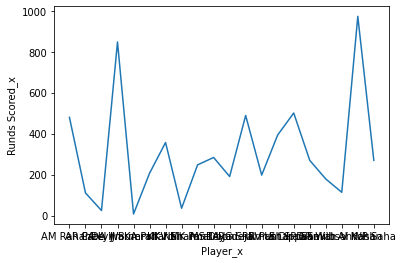

In [6]:
x=for_2018.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x', 'Runds Scored_x', 'Batting Average_x', 'Balls Faced_x', 'Batting Strike Rate_x','100_x', '50_x','4s_x', '6s_x']].head(20)

y = sns.lineplot(x['Player_x'], x['Runds Scored_x'])

Text(0.5, 1.0, 'Distribution of Batting Strike Rates in 2018')

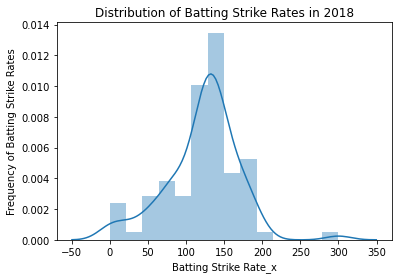

In [7]:
fig = sns.distplot(for_2020.sort_values(by = 'price', ascending = False)['Batting Strike Rate_x'])
fig.set_ylabel('Frequency of Batting Strike Rates')
fig.set_title('Distribution of Batting Strike Rates in 2018')

Text(0.5, 1.0, 'Distribution of Batting Average in 2018')

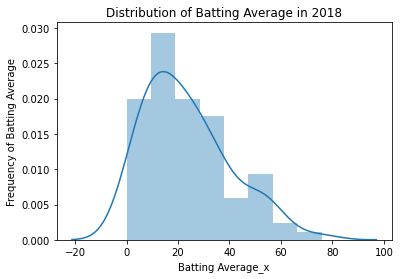

In [8]:
fig = sns.distplot(for_2020.sort_values(by = 'price', ascending = False)['Batting Average_x'])
fig.set_ylabel('Frequency of Batting Average')
fig.set_title('Distribution of Batting Average in 2018')

Text(0.5, 1.0, 'Batting Strike Rates Against Prices in 2018 for Top 20 Players')

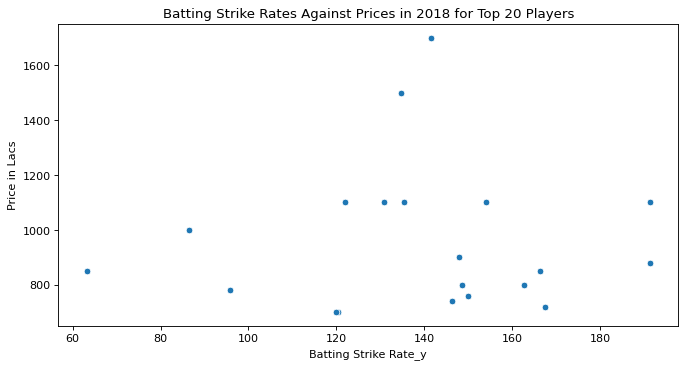

In [9]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

fig = sns.scatterplot(data = for_2020.sort_values(by = 'price', ascending = False).head(20), x='Batting Strike Rate_y', y='price', sizes=(5000, 200))
fig.set_ylabel('Price in Lacs')
fig.set_title('Batting Strike Rates Against Prices in 2018 for Top 20 Players')

Text(0.5, 1.0, 'Batting Average Against Prices in 2018 for Top 20 Players')

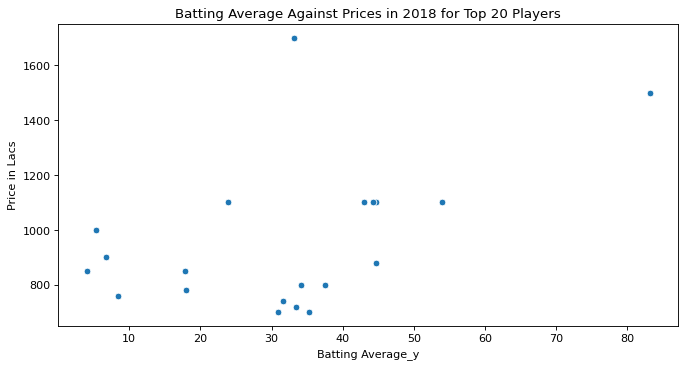

In [10]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

fig = sns.scatterplot(data = for_2020.sort_values(by = 'price', ascending = False).head(20), x='Batting Average_y', y='price', sizes=(5000, 200))
fig.set_ylabel('Price in Lacs')
fig.set_title('Batting Average Against Prices in 2018 for Top 20 Players')

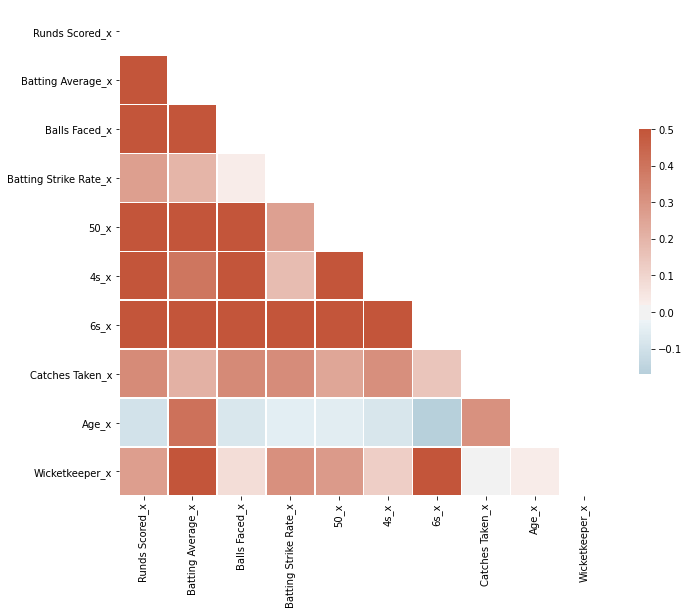

In [11]:
a = for_2020[for_2020['AllRounder_x']=='bat'].sort_values(by = 'price', ascending = False).head(20)
a = a.iloc[:, [3,4,5,6,8,9,10,18,20,22]]
corr = a.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
z_18= for_2018[for_2018['AllRounder_x']=='bowl']
z2_18=z_18.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x', 'Wickets Taken_x', 'Bowling Average_x', 'Bowling Strike Rate_x', 'Bowling Economy Rate_x']].head(10)

z_19= for_2019[for_2019['AllRounder_x']=='bowl']
z2_19=z_19.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x', 'Wickets Taken_x', 'Bowling Average_x', 'Bowling Strike Rate_x', 'Bowling Economy Rate_x']].head(10)

z_20= for_2020[for_2020['AllRounder_x']=='bowl']
z2_20=z_19.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x', 'Wickets Taken_x', 'Bowling Average_x', 'Bowling Strike Rate_x', 'Bowling Economy Rate_x']].head(10)


#5 most expensive bowlers
print('5 most expensive bowlers in 2020')
print(z2_20.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x']].head(5))
print('5 most expensive bowlers in 2019')
print(z2_19.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x']].head(5))
print('5 most expensive bowlers in 2018')
print(z2_18.sort_values(by = 'price', ascending = False)[['Player_x', 'price', 'AllRounder_x']].head(5))

#5 least expensive bowlers
print('\n\n5 least expensive bowlers in 2020')
print(z_20.sort_values(by = 'price', ascending = True)[['Player_x', 'price', 'AllRounder_x']].head(5))
print('5 least expensive bowlers in 2019')
print(z_19.sort_values(by = 'price', ascending = True)[['Player_x', 'price', 'AllRounder_x']].head(5))
print('5 least expensive bowlers in 2018')
print(z_18.sort_values(by = 'price', ascending = True)[['Player_x', 'price', 'AllRounder_x']].head(5))



5 most expensive bowlers in 2020
       Player_x  price AllRounder_x
64  Rashid Khan  900.0         bowl
26    SP Narine  850.0         bowl
61      B Kumar  850.0         bowl
78   JD Unadkat  840.0         bowl
74       AJ Tye  720.0         bowl
5 most expensive bowlers in 2019
       Player_x  price AllRounder_x
64  Rashid Khan  900.0         bowl
26    SP Narine  850.0         bowl
61      B Kumar  850.0         bowl
78   JD Unadkat  840.0         bowl
74       AJ Tye  720.0         bowl
5 most expensive bowlers in 2018
     Player_x   price AllRounder_x
47  JJ Bumrah  1200.0         bowl
67  KV Sharma   900.0         bowl
34  SP Narine   700.0         bowl
13   S Nadeem   620.0         bowl
11   A Mishra   600.0         bowl


5 least expensive bowlers in 2020
             Player_x  price AllRounder_x
93            S Gopal   20.0         bowl
15       S Lamichhane   20.0         bowl
57           M Ashwin   20.0         bowl
37  M Prasidh Krishna   20.0         bowl
21          M

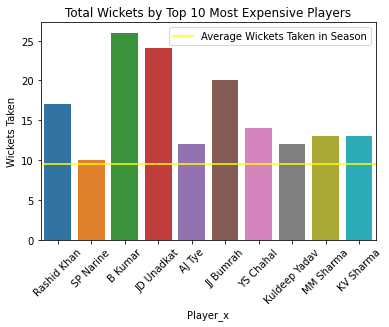

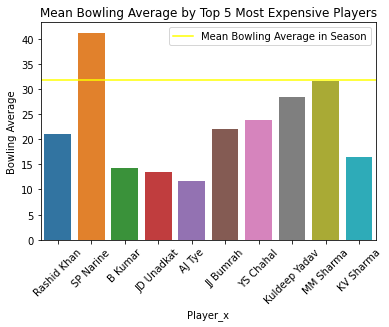

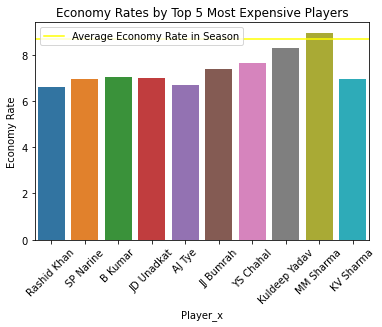

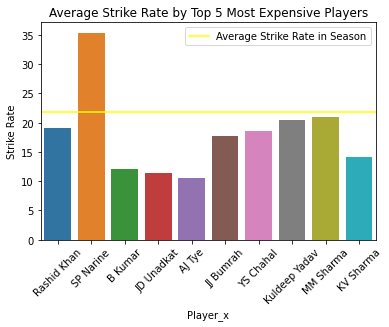

Text(0.5, 1.0, 'Bowling Strike Rates Against Prices in 2020 for Top 20 Bowlers')

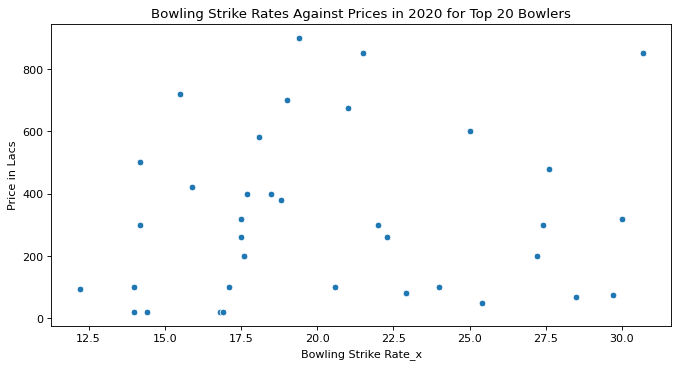

In [13]:

    
y1 = sns.barplot(z2_20['Player_x'], z2_20['Wickets Taken_x'])
z= for_2020['Wickets Taken_x'].mean()
y1.axhline(z, color='yellow', label='Average Wickets Taken in Season')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Wickets Taken')
plt.title('Total Wickets by Top 10 Most Expensive Players')
plt.show()

    
y2 = sns.barplot(z2_20['Player_x'], z2_20['Bowling Average_x'])
z= for_2020['Bowling Average_x'].mean()
y2.axhline(z, color='yellow', label='Mean Bowling Average in Season')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Bowling Average')
plt.title('Mean Bowling Average by Top 5 Most Expensive Players')
plt.show()

y3 = sns.barplot(z2_20['Player_x'], z2_20['Bowling Economy Rate_x'])
z= for_2020['Bowling Economy Rate_x'].mean()
y3.axhline(z, color='yellow', label='Average Economy Rate in Season')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Economy Rate')
plt.title('Economy Rates by Top 5 Most Expensive Players')
plt.show()

y4 = sns.barplot(z2_20['Player_x'], z2_20['Bowling Strike Rate_x'])
z= for_2020['Bowling Strike Rate_x'].mean()
y4.axhline(z, color='yellow', label='Average Strike Rate in Season')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Strike Rate')
plt.title('Average Strike Rate by Top 5 Most Expensive Players')
plt.show()

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')


fig = sns.scatterplot(data = z_20.sort_values(by = 'price', ascending = False), x='Bowling Strike Rate_x', y='price', sizes=(5000, 200))
fig.set_ylabel('Price in Lacs')
fig.set_title('Bowling Strike Rates Against Prices in 2020 for Top 20 Bowlers')




Text(0.5, 1.0, 'Distribution of Bowling Average in 2020')

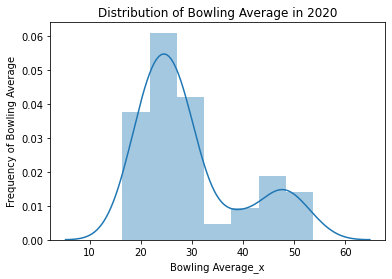

In [14]:
fig = sns.distplot(z_20.sort_values(by = 'price', ascending = False)['Bowling Average_x'])
fig.set_ylabel('Frequency of Bowling Average')
fig.set_title('Distribution of Bowling Average in 2020')

In [15]:
#for_2020 = df_2018.merge(df_2019, how = 'left', on = 'reference numbers')
temp = df_2019.merge(df_price2020, how = 'left', on = 'reference numbers')

In [16]:
temp = temp.dropna()

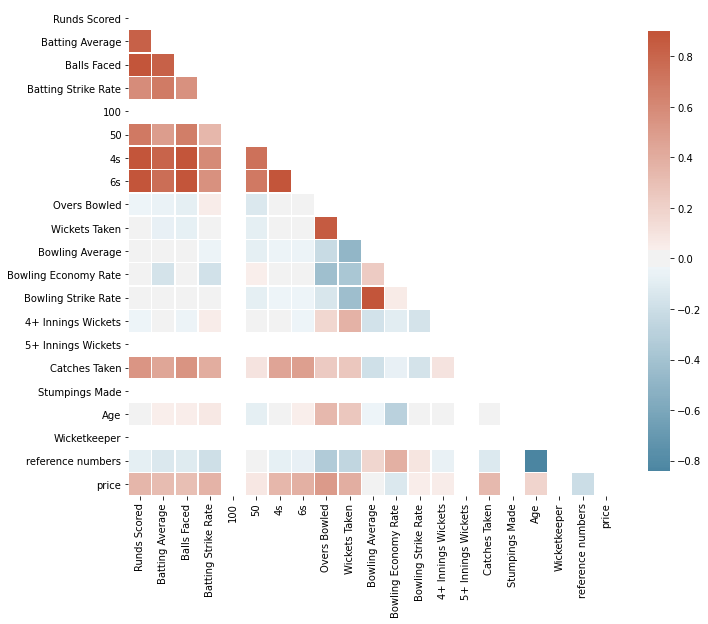

In [17]:

corr = temp.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})

In [18]:
import regex as re
for_2020 = for_2020.rename(columns=lambda x: re.sub('_x',' year2',x))
for_2020 = for_2020.rename(columns=lambda x: re.sub('_y',' year1',x))
for_2020['player_age']=for_2020['Age year1']+1
for_2020.drop(['Country year1','Age year1','Tournament year1','Player year1','Team year1','reference numbers','AllRounder year2','Wicketkeeper year2','Country year2','Age year2','Tournament year2','Player year2','Team year2'],axis=1,inplace=True)
for_2020.replace({'all':1,'bat':0,'bowl':0},inplace=True)
for_2020 = for_2020[for_2020['player_age'].notna()]
for_2020.fillna(0,inplace=True)
for_2020

,Runds Scored year2,Batting Average year2,Balls Faced year2,Batting Strike Rate year2,100 year2,50 year2,4s year2,6s year2,Overs Bowled year2,Wickets Taken year2,...,Bowling Strike Rate year1,4+ Innings Wickets year1,5+ Innings Wickets year1,Catches Taken year1,Stumpings Made year1,Wicketkeeper year1,AllRounder year1,price,popularity_index,player_age
0,46.0,46.00,26.0,176.92,0.0,0.0,3.0,2.0,14.0,3.0,...,15.2,0.0,0.0,4,0,0.0,1,1000.0,191000000,33.0
1,684.0,52.61,394.0,173.60,1.0,5.0,68.0,37.0,0.0,0.0,...,0.0,0.0,0.0,18,6,1.0,0,800.0,33300000,23.0
2,411.0,37.36,310.0,132.58,0.0,4.0,29.0,21.0,0.0,0.0,...,0.0,0.0,0.0,8,0,0.0,0,700.0,5600000,25.0
3,1.0,0.00,2.0,50.00,0.0,0.0,0.0,0.0,37.0,12.0,...,21.8,0.0,0.0,1,0,0.0,0,400.0,107000000,37.0
4,7.0,7.00,6.0,116.66,0.0,0.0,1.0,0.0,13.5,3.0,...,17.0,0.0,0.0,5,0,0.0,0,480.0,3850000,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,196.0,16.33,161.0,121.73,0.0,0.0,13.0,6.0,37.0,8.0,...,16.8,0.0,0.0,3,0,0.0,1,125.0,15700000,29.0
97,226.0,25.11,167.0,135.32,0.0,1.0,18.0,8.0,0.0,0.0,...,0.0,0.0,0.0,3,0,0.0,0,60.0,8100000,29.0
98,20.0,20.00,21.0,95.23,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,1,0,0.0,1,20.0,16800,21.0
99,126.0,14.00,64.0,196.87,0.0,0.0,9.0,9.0,40.0,11.0,...,120.0,0.0,0.0,0,0,0.0,0,620.0,70800000,32.0


In [19]:
for_2018.columns

Index(['Team_x', 'Player_x', 'Tournament_x', 'Runds Scored_x',
       'Batting Average_x', 'Balls Faced_x', 'Batting Strike Rate_x', '100_x',
       '50_x', '4s_x', '6s_x', 'Overs Bowled_x', 'Wickets Taken_x',
       'Bowling Average_x', 'Bowling Economy Rate_x', 'Bowling Strike Rate_x',
       '4+ Innings Wickets_x', '5+ Innings Wickets_x', 'Catches Taken_x',
       'Stumpings Made_x', 'Age_x', 'Country_x', 'Wicketkeeper_x',
       'AllRounder_x', 'reference numbers', 'Team_y', 'Player_y',
       'Tournament_y', 'Runds Scored_y', 'Batting Average_y', 'Balls Faced_y',
       'Batting Strike Rate_y', '100_y', '50_y', '4s_y', '6s_y',
       'Overs Bowled_y', 'Wickets Taken_y', 'Bowling Average_y',
       'Bowling Economy Rate_y', 'Bowling Strike Rate_y',
       '4+ Innings Wickets_y', '5+ Innings Wickets_y', 'Catches Taken_y',
       'Stumpings Made_y', 'Age_y', 'Country_y', 'Wicketkeeper_y',
       'AllRounder_y', 'price', 'popularity_index'],
      dtype='object')

In [20]:
for_2019 = for_2019.rename(columns=lambda x: re.sub('_x',' year2',x))
for_2019 = for_2019.rename(columns=lambda x: re.sub('_y',' year1',x))
for_2019['player_age']=for_2019['Age year1']+1
for_2019.drop(['Country year1','Age year1','Tournament year1','Player year1','Team year1','reference numbers','AllRounder year2','Wicketkeeper year2','Country year2','Age year2','Tournament year2','Player year2','Team year2'],axis=1,inplace=True)
for_2019.replace({'all':1,'bat':0,'bowl':0},inplace=True)
for_2019 = for_2019[for_2019['player_age'].notna()]
for_2019.fillna(0,inplace=True)

In [21]:
for_2018 = for_2018.rename(columns=lambda x: re.sub('_x',' year2',x))
for_2018 = for_2018.rename(columns=lambda x: re.sub('_y',' year1',x))
for_2018['player_age']=for_2018['Age year1']+1
for_2018.drop(['Country year1','Age year1','Tournament year1','Player year1','Team year1','reference numbers','AllRounder year2','Wicketkeeper year2','Country year2','Age year2','Tournament year2','Player year2','Team year2'],axis=1,inplace=True)
for_2018.replace({'all':1,'bat':0,'bowl':0},inplace=True)
for_2018 = for_2018[for_2018['player_age'].notna()]
for_2018.fillna(0,inplace=True)

In [22]:
df_final=pd.concat([for_2018,for_2019,for_2020])
df_final

,Runds Scored year2,Batting Average year2,Balls Faced year2,Batting Strike Rate year2,100 year2,50 year2,4s year2,6s year2,Overs Bowled year2,Wickets Taken year2,...,Bowling Strike Rate year1,4+ Innings Wickets year1,5+ Innings Wickets year1,Catches Taken year1,Stumpings Made year1,Wicketkeeper year1,AllRounder year1,price,popularity_index,player_age
0,195.0,65.00,109.0,178.89,0.0,1.0,15.0,12.0,44.0,13.0,...,15.5,1.0,0.0,5,0,0.0,1,700.0,191000000,31.0
1,357.0,35.70,297.0,120.20,0.0,3.0,40.0,6.0,0.0,0.0,...,0.0,0.0,0.0,2,0,0.0,0,1100.0,7400000,26.0
2,57.0,28.50,59.0,96.61,0.0,0.0,2.0,3.0,9.0,1.0,...,12.0,0.0,0.0,3,0,0.0,0,150.0,11400000,25.0
3,291.0,26.45,259.0,112.35,0.0,1.0,20.0,8.0,0.0,0.0,...,0.0,0.0,0.0,4,0,1.0,0,220.0,12000000,24.0
4,198.0,24.75,152.0,130.26,0.0,1.0,19.0,6.0,0.0,0.0,...,0.0,0.0,0.0,8,3,1.0,0,710.0,33300000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,196.0,16.33,161.0,121.73,0.0,0.0,13.0,6.0,37.0,8.0,...,16.8,0.0,0.0,3,0,0.0,1,125.0,15700000,29.0
97,226.0,25.11,167.0,135.32,0.0,1.0,18.0,8.0,0.0,0.0,...,0.0,0.0,0.0,3,0,0.0,0,60.0,8100000,29.0
98,20.0,20.00,21.0,95.23,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,1,0,0.0,1,20.0,16800,21.0
99,126.0,14.00,64.0,196.87,0.0,0.0,9.0,9.0,40.0,11.0,...,120.0,0.0,0.0,0,0,0.0,0,620.0,70800000,32.0


In [23]:
df_final.isnull().sum()

Runds Scored year2            0
Batting Average year2         0
Balls Faced year2             0
Batting Strike Rate year2     0
100 year2                     0
50 year2                      0
4s year2                      0
6s year2                      0
Overs Bowled year2            0
Wickets Taken year2           0
Bowling Average year2         0
Bowling Economy Rate year2    0
Bowling Strike Rate year2     0
4+ Innings Wickets year2      0
5+ Innings Wickets year2      0
Catches Taken year2           0
Stumpings Made year2          0
Runds Scored year1            0
Batting Average year1         0
Balls Faced year1             0
Batting Strike Rate year1     0
100 year1                     0
50 year1                      0
4s year1                      0
6s year1                      0
Overs Bowled year1            0
Wickets Taken year1           0
Bowling Average year1         0
Bowling Economy Rate year1    0
Bowling Strike Rate year1     0
4+ Innings Wickets year1      0
5+ Innin

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y= df_final['price']
X=df_final.iloc[0:,0:36]
X=X.assign(player_age=df_final['player_age'])
X=X.assign(popularity_index=df_final['popularity_index'])
#X['popularity_index']=X['popularity_index'].str.replace(',','').astype(float)

               

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.90,test_size=0.1)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(X_test)
y_pred

array([315.02598653, 136.89523218, 102.62559964, 683.55764664,
       952.80477241, 401.26052504, 144.41153818, 432.64745804,
       634.589152  , 274.73713065, 573.34381864, 553.74782168,
       513.89001049, 338.27761528, 718.22458976, 197.00480945,
       328.09415742, 366.23915007, 151.60515586, 598.34110298,
       381.14334378, 407.22949115, 165.08753315, 449.10980058,
       627.56781732, 379.20749971, 634.6714061 , 712.4960977 ])

In [29]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-6.99208591e-01 -3.40641916e-01  2.15057106e+00 -4.93820076e-01
  3.30794894e+01  5.57304050e+01 -7.59727179e+00  5.65725295e+00
  8.63910846e+00 -9.55035823e+00  4.81017886e+00 -7.71833682e+00
 -7.63730330e+00 -8.21162104e+01  3.17316492e+02  1.24948510e+01
  4.28136002e+01  3.08406648e+00  5.95698650e+00 -1.26516772e+00
 -4.09365141e-01  2.41548796e+01  5.20571660e+01 -1.48546841e+01
 -2.33055230e+01  5.29842839e+00 -3.28794975e+00  3.30589625e-01
  2.48158381e+00 -1.85954748e+00  1.83903340e+01  6.66394490e+01
  7.46597759e+00  2.42181729e+01 -7.11609655e+01  9.25843794e+01
 -4.51793084e+00 -3.32632488e-08]


In [30]:
from sklearn.metrics import mean_squared_error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

Mean squared error: 139235.69


In [31]:
model.score(X_train,y_train)

0.5348739374906708

In [32]:
true = y_test
predicted= y_pred

In [34]:
from sklearn.metrics import mean_squared_error, explained_variance_score

mae = mean_squared_error(true, predicted)
print('Mean Squared Error : {}'.format(mae))

rmse = np.sqrt(mean_squared_error(true, predicted))
print('Root Mean Squared Error : {}'.format(rmse))


evs = explained_variance_score(true, predicted)
print('Explained Variance Score: {}'.format(evs))



Mean Squared Error : 139235.68631958973
Root Mean Squared Error : 373.1429837469676
Explained Variance Score: 69.75
